# БАЗОВАЯ ВИЗУАЛИЗАЦИЯ В PANDAS

[**plot()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) - основной метод для создания простейших графиков в Pandas

[**О цветовых гаммах**](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

Основные параметры метода plot():

* x — название признака, который будет отложен по оси абсцисс;
* y — название признака, который будет отложен по оси ординат;
* figsize — размер графика (кортеж из ширины и высоты в дюймах);
* kind —тип визуализации. Основные типы:
  * 'line' — линейный график (по умолчанию);
  * 'bar' — столбчатая диаграмма;
  * 'barh' — горизонтальная столбчатая диаграмма;
  * 'hist' — гистограмма;
  * 'box' — коробчатая диаграмма (boxplot);
  * 'pie' — круговая диаграмма;
  * 'scatter' — диаграмма рассеяния.
* grid — отображение сетки (по умолчанию False);
* legend — отображение легенды (по умолчанию False);
* title — название графика;
* color — цвет.

In [2]:
import pandas as pd
from IPython.display import display
covid_df = pd.read_csv('data/covid_merged.csv', sep=';')
covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


##### ЛИНЕЙНЫЙ ГРАФИК

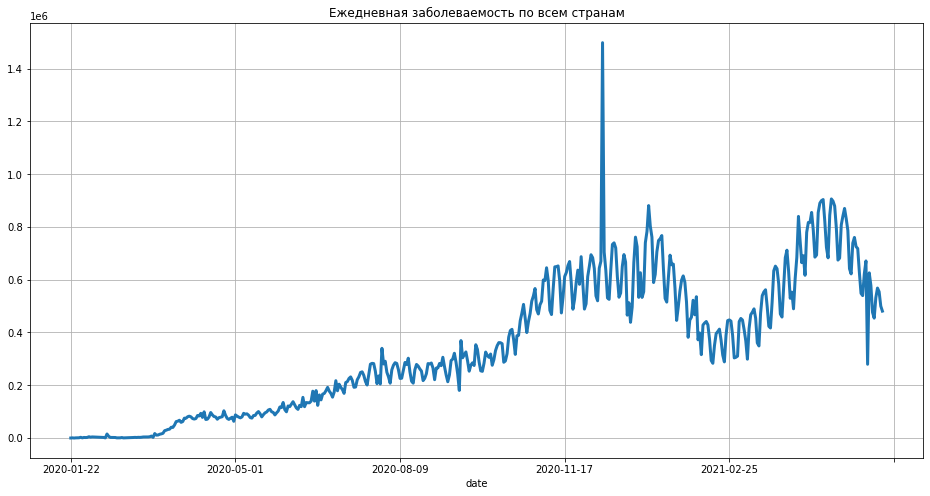

In [10]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum() # сгруппировать общее ежедневное кол-во заболевших по датам
grouped_cases.plot(
    kind='line', # линейный график
    figsize=(16, 8), # размер фигуры шир/выс в дюймах
    title='Ежедневная заболеваемость по всем странам',
    grid = True,
    lw=3 # (line width) - ширина линии для линейного графика
); # ; используется, чтобы избежать вывода служебной информации в ноутбуке

ВЫВОДЫ ЛИНЕЙНЫЙ ГРАФИК:

На графике выше отчётливо виден умеренный начальный рост заболеваемости, после чего наблюдается её резкое повышение в середине октября 2020 года, а в декабре 2020 года — аномальная вспышка коронавируса (зафиксировано более 1.4 млн. заболевших в день). Такой резкий максимум, возможно, является ошибкой в данных и требует более детального разбора. Далее заметно постепенное уменьшение числа ежедневно фиксируемых случаев и наступление второй волны в марте 2021 года. Наконец, начиная с мая 2021 года наблюдается очередной спад.

Пилообразность графика (подъёмы и спады с периодом в 7 дней) может быть связана с рабочими и выходными днями.

Нам неизвестно, как  устроен во времени процесс постановки диагноза и сбора статистики и отличается ли он в разных странах. Можно предположить, что:

* спад в выходные обусловлен меньшей интенсивностью работы медицинских служб;
* в тех случаях, когда диагноз ставится по результатам анализа, если в выходные берётся/проводится меньше тестов, к понедельнику они ещё не готовы и диагноз ещё не поставлен;
* минимум в понедельник может быть запаздыванием подсчёта статистики, т.е. на самом деле данные за понедельник — это данные за воскресенье.

##### ГИСТОГРАММА

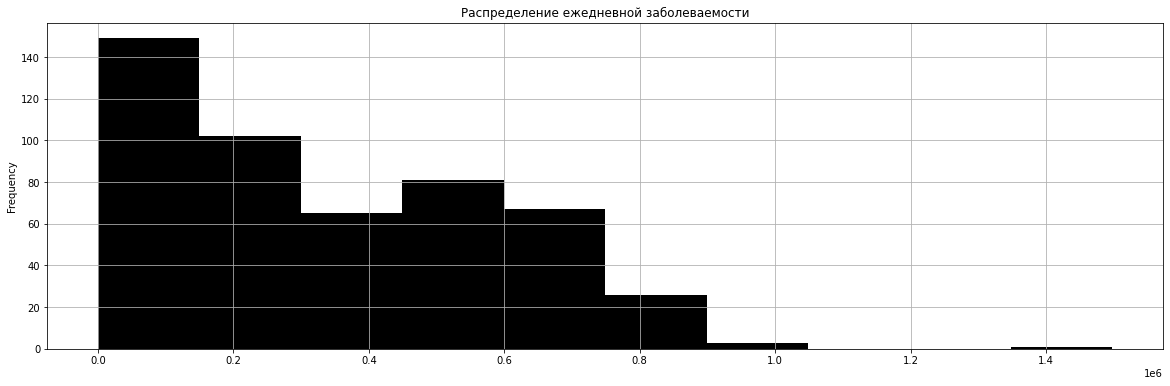

In [20]:
grouped_cases.plot( # те же данные
    kind='hist',
    figsize=(20, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=10 # количество столбцов/интервалов ("корзин")
);

ВЫВОДЫ ГИСТОГРАММА

По гистограмме можно судить о частоте попадания ежедневной заболеваемости в определённый интервал. На оси абсцисс отложен диапазон ежедневной заболеваемости (в млн человек), разбитый на десять равных интервалов, на оси ординат — число наблюдений, попавших в этот интервал.

* Мы видим модальное значение около нуля (от 0 до примерно 150 тыс. заболеваний в день), то есть большинство наблюдений сосредоточено в первом интервале, далее частота постепенно падает. Это связано с тем, что долгое время распространение вируса было довольно слабым.
* В глаза бросается «пенёк», соответствующий резкой вспышке заболеваемости, которую мы видели ранее. Его высота очень мала, ведь такое наблюдение единственное. Даже на гистограмме кажется, что данное наблюдение является аномальным и, скорее всего, представляет собой выброс.

##### СТОЛБЧАТАЯ ДИАГРАММА

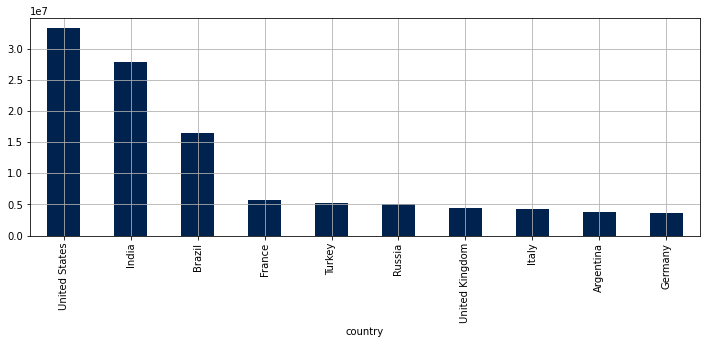

In [23]:
grouped_country = covid_df.groupby("country")['confirmed'].last() # взять последние наблюдаемые значения кол-ва заболевших во всех странах
grouped_country = grouped_country.nlargest(10) # из них оставить 10 самых больших
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='cividis' # выбор цветовой гаммы
);

ВЫВОДЫ СТОЛБЧАТАЯ ДИАГРАММА:

На диаграмме видно, что лидерами по числу заболевших являются Соединённые Штаты, Индия и Бразилия. Соотношение зафиксированных случаев заражения в остальных странах примерно одинаковое.

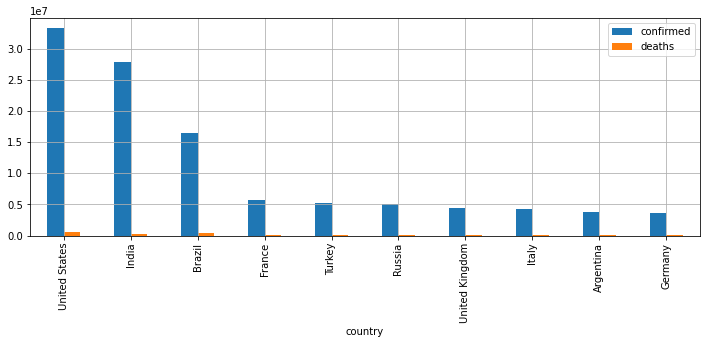

In [28]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4),
);

Этот график является небольшим усовершенствованием предыдущего. Теперь на нём можно увидеть соотношение зафиксированных случаев заражения и смертей.

Очевидно, что отношение числа умерших к числу заболевших весьма низкое. Также это может косвенно говорить о разных методиках учёта заболевших (например, какие-то страны могут учитывать заболевших только по мазку, в то время как другие — по клинической картине, учитывающей и другие показатели). То есть с методической точки зрения учёт по числу заражений может быть не совсем корректным. Лучшим показателем будет являться число смертей (хотя и этот метод не идеален).

Более того, если построить график с сортировкой не по числу заболевших, а по числу умерших, поменяются и места, и страны в рейтинге.

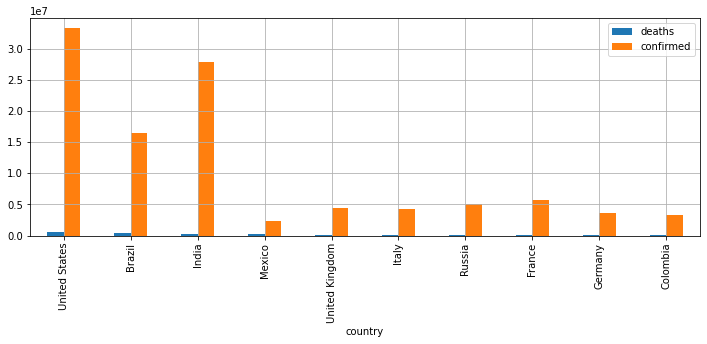

In [30]:
grouped_country = covid_df.groupby(['country'])[['deaths','confirmed']].last()
grouped_country = grouped_country.nlargest(10, columns=['deaths'])
grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4),
);

##### Задачи

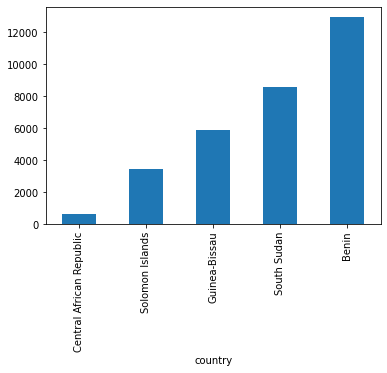

In [31]:
# С помощью какого из перечисленных ниже вариантов кода можно построить
# столбчатую диаграмму для пяти стран с наименьшим общим числом вакцинаций
# на последний день рассматриваемого периода (total_vaccinations)?
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');